### PART I

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
data = {
    "value1": [10, 9, 2, 15, 10,16,11,16],
    "value2": [95, 80, 10, 50, 45, 98, 38,93]
}

df = pd.DataFrame(data)

In [ ]:
df.head()

,value1,value2
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45


In [ ]:
X = df.value1.values.reshape(-1, 1)
y = df["value2"].values.ravel()

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

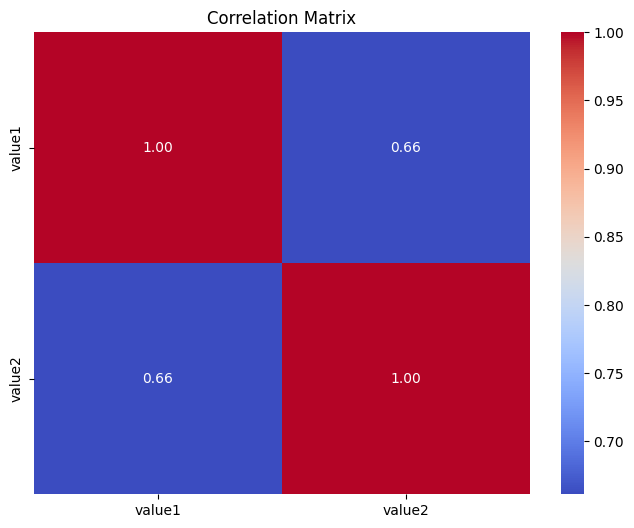

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Linear Regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_scaled, y)
y_pred_linear = linear_model.predict(X_scaled)

mse_linear = mean_squared_error(y, y_pred_linear)

r2_linear = r2_score(y, y_pred_linear)

r2_linear



0.43709481451010035

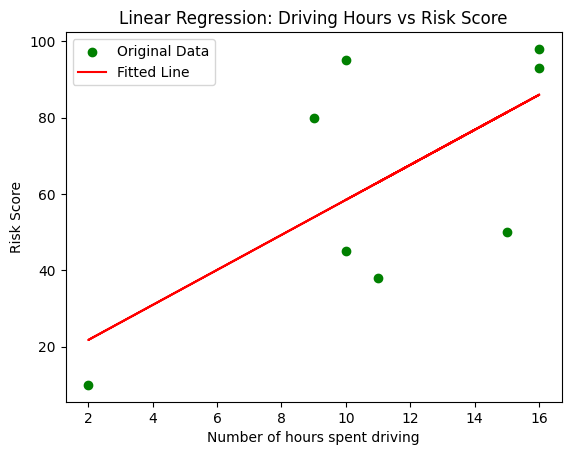

In [ ]:
plt.scatter(X, y, color='green', label='Original Data')
plt.plot(X, y_pred_linear, color='red', label='Fitted Line')
plt.xlabel('Number of hours spent driving')
plt.ylabel('Risk Score')
plt.title('Linear Regression: Driving Hours vs Risk Score')
plt.legend()
plt.show()

Polynomial Regression

In [ ]:

poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

y_pred_poly = poly_model.predict(X_poly)

mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print(f"Polynomial Regression MSE: {mse_poly:.4f}")
print(f"Polynomial Regression R²: {r2_poly:.4f}")


Polynomial Regression MSE: 173.4612
Polynomial Regression R²: 0.8115


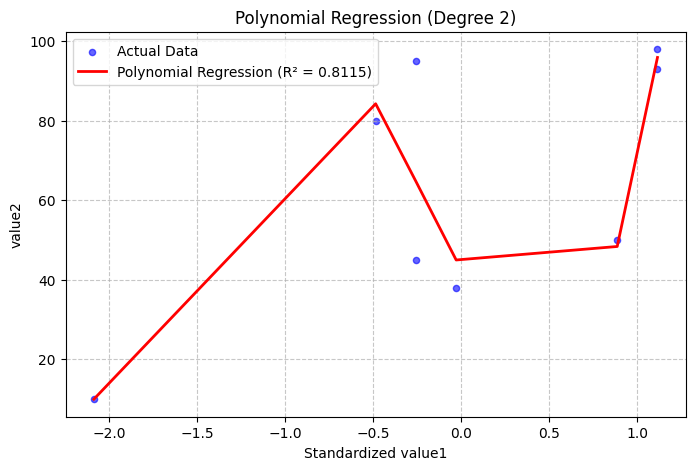

In [ ]:
# Sort X and predictions for a smooth curve
sorted_indices = np.argsort(X_scaled.flatten())
X_sorted = X_scaled[sorted_indices]
y_sorted = y[sorted_indices]
y_pred_sorted = y_pred_poly[sorted_indices]

# Plot the polynomial regression curve
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled, y, color='blue', label='Actual Data', alpha=0.6, s=20)
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label=f'Polynomial Regression (R² = {r2_poly:.4f})')

# Add labels and title
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Standardized value1')
plt.ylabel('value2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## PART **II**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

# Load California Housing dataset
X, y = fetch_california_housing(return_X_y=True)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"  Test MSE: {linear_mse:.4f}")
print(f"  Test R²: {linear_r2:.4f}")
print("-" * 40)

Linear Regression:
  Test MSE: 0.5559
  Test R²: 0.5758
----------------------------------------


Ridge Regression:
  Best alpha: 3.39322177189533
  Test MSE: 0.5558
  Test R²: 0.5759
  Cross-Validation R²: 0.6115 ± 0.0124
----------------------------------------


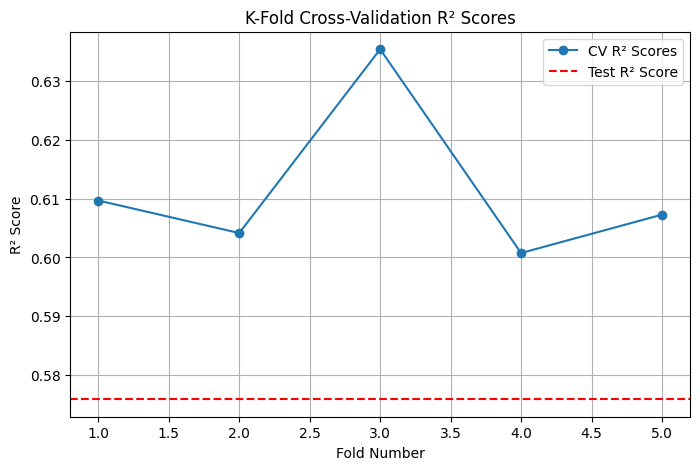

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Use K-Fold instead of StratifiedKFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define Ridge Regression parameter grid
ridge_param_grid = {'alpha': np.logspace(-4, 2, 50)}

# Perform Grid Search with K-Fold
ridge_model = GridSearchCV(Ridge(), ridge_param_grid, cv=kf, scoring='r2', n_jobs=-1)
ridge_model.fit(X_train, y_train)

# Get best model and make predictions
best_ridge = ridge_model.best_estimator_
ridge_y_pred = best_ridge.predict(X_test)

# Evaluate Performance
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_cv_scores = cross_val_score(best_ridge, X_train, y_train, cv=kf, scoring='r2')

# Print Results
print("Ridge Regression:")
print(f"  Best alpha: {ridge_model.best_params_['alpha']}")
print(f"  Test MSE: {ridge_mse:.4f}")
print(f"  Test R²: {ridge_r2:.4f}")
print(f"  Cross-Validation R²: {ridge_cv_scores.mean():.4f} ± {ridge_cv_scores.std():.4f}")
print("-" * 40)

# Plot Accuracy (R² Scores)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), ridge_cv_scores, marker='o', linestyle='-', label="CV R² Scores")
plt.axhline(y=ridge_r2, color='r', linestyle='--', label="Test R² Score")
plt.xlabel("Fold Number")
plt.ylabel("R² Score")
plt.title("K-Fold Cross-Validation R² Scores")
plt.legend()
plt.grid()
plt.show()


Lasso Regression:
  Best alpha: 0.0007196856730011522
  Test MSE: 0.5549
  Test R²: 0.5766
  Cross-Validation R²: 0.6115 ± 0.0123
  Lasso Converged in 81 iterations.
----------------------------------------


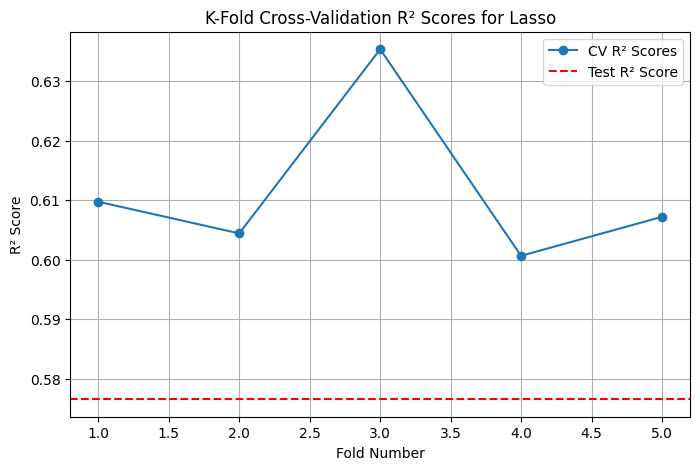

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define Lasso Regression parameter grid
lasso_param_grid = {'alpha': np.logspace(-4, 2, 50)}

# Perform Grid Search with K-Fold
lasso_model = GridSearchCV(Lasso(max_iter=20000), lasso_param_grid, cv=kf, scoring='r2', n_jobs=-1)
lasso_model.fit(X_train, y_train)

# Get best model and make predictions
best_lasso = lasso_model.best_estimator_
lasso_y_pred = best_lasso.predict(X_test)

# Evaluate Performance
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_cv_scores = cross_val_score(best_lasso, X_train, y_train, cv=kf, scoring='r2')

# Print Results
print("Lasso Regression:")
print(f"  Best alpha: {lasso_model.best_params_['alpha']}")
print(f"  Test MSE: {lasso_mse:.4f}")
print(f"  Test R²: {lasso_r2:.4f}")
print(f"  Cross-Validation R²: {lasso_cv_scores.mean():.4f} ± {lasso_cv_scores.std():.4f}")

# Check if `n_iter_` is available (depends on solver)
if hasattr(best_lasso, "n_iter_"):
    print(f"  Lasso Converged in {best_lasso.n_iter_} iterations.")

print("-" * 40)

# Plot Accuracy (R² Scores)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), lasso_cv_scores, marker='o', linestyle='-', label="CV R² Scores")
plt.axhline(y=lasso_r2, color='r', linestyle='--', label="Test R² Score")
plt.xlabel("Fold Number")
plt.ylabel("R² Score")
plt.title("K-Fold Cross-Validation R² Scores for Lasso")
plt.legend()
plt.grid()
plt.show()


ElasticNet Regression:
  Best alpha: 0.0007196856730011522
  Best l1_ratio: 1.0
  Test MSE: 0.5549
  Test R²: 0.5766
  Cross-Validation R²: 0.6115 ± 0.0123
  ElasticNet Converged in 81 iterations.
----------------------------------------


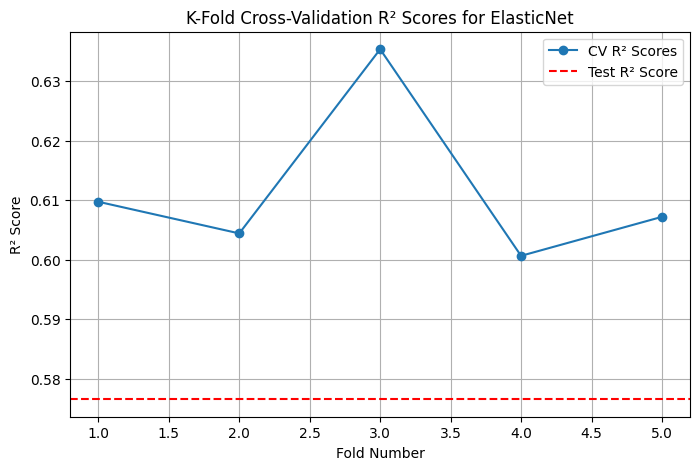

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define ElasticNet parameter grid
elastic_param_grid = {
    'alpha': np.logspace(-4, 2, 50),
    'l1_ratio': np.linspace(0.1, 1, 10)  # Tuning both alpha and l1_ratio
}

# Perform Grid Search with K-Fold CV
elastic_model = GridSearchCV(ElasticNet(max_iter=20000), elastic_param_grid, cv=kf, scoring='r2', n_jobs=-1)
elastic_model.fit(X_train, y_train)

# Get best model and make predictions
best_elastic = elastic_model.best_estimator_
elastic_y_pred = best_elastic.predict(X_test)

# Evaluate Performance
elastic_mse = mean_squared_error(y_test, elastic_y_pred)
elastic_r2 = r2_score(y_test, elastic_y_pred)
elastic_cv_scores = cross_val_score(best_elastic, X_train, y_train, cv=kf, scoring='r2')

# Print Results
print("ElasticNet Regression:")
print(f"  Best alpha: {elastic_model.best_params_['alpha']}")
print(f"  Best l1_ratio: {elastic_model.best_params_['l1_ratio']}")
print(f"  Test MSE: {elastic_mse:.4f}")
print(f"  Test R²: {elastic_r2:.4f}")
print(f"  Cross-Validation R²: {elastic_cv_scores.mean():.4f} ± {elastic_cv_scores.std():.4f}")

# Check if `n_iter_` is available (depends on solver)
if hasattr(best_elastic, "n_iter_"):
    print(f"  ElasticNet Converged in {best_elastic.n_iter_} iterations.")

print("-" * 40)

# Plot Accuracy (R² Scores)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), elastic_cv_scores, marker='o', linestyle='-', label="CV R² Scores")
plt.axhline(y=elastic_r2, color='r', linestyle='--', label="Test R² Score")
plt.xlabel("Fold Number")
plt.ylabel("R² Score")
plt.title("K-Fold Cross-Validation R² Scores for ElasticNet")
plt.legend()
plt.grid()
plt.show()
